In [1]:
%reload_ext nb_black
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from statsmodels.graphics.gofplots import qqplot
from sklearn.feature_selection import SelectKBest, f_classif


warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

postgres_user = "dsbc_student"
postgres_pw = "7*.8G9QH21"
postgres_host = "142.93.121.174"
postgres_port = "5432"
postgres_db = "lifeexpectancy"
table_name = "lifeexpectancy"

<IPython.core.display.Javascript object>

In [2]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

life_expc_df = pd.read_sql_query("select * from lifeexpectancy", con=engine)

# no need for an open connection,
# as we're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [3]:
life_expc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<IPython.core.display.Javascript object>

In [4]:
life_expc_df.head(50)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


<IPython.core.display.Javascript object>

In [5]:
# check a missingness summary
def missingness_summary(df, print_log=False, sort=None):
    missings = df.isna().mean()

    if sort == "asc":
        missings = missings.sort_values()
    elif sort == "desc":
        missings = missings.sort_values(ascending=False)

    if print_log:
        print(missings)

    return missings

<IPython.core.display.Javascript object>

In [6]:
life_missing_report = missingness_summary(life_expc_df, print_log=True, sort="desc")

Population                         0.221920
Hepatitis B                        0.188223
GDP                                0.152485
Total expenditure                  0.076923
Alcohol                            0.066031
Income composition of resources    0.056841
Schooling                          0.055480
 BMI                               0.011572
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Diphtheria                         0.006467
Polio                              0.006467
Adult Mortality                    0.003404
Life expectancy                    0.003404
under-five deaths                  0.000000
 HIV/AIDS                          0.000000
Measles                            0.000000
percentage expenditure             0.000000
infant deaths                      0.000000
Status                             0.000000
Year                               0.000000
Country                            0.000000
dtype: float64


<IPython.core.display.Javascript object>

In this dataset, `population`, `Hepatitis B`, `GDP` are our columns with missingness from 15% to 22%. Our other missing columns will be handled next

In [7]:
country_missing_pop_counts = life_expc_df[life_expc_df["Population"].isna()][
    "Country"
].value_counts()
country_missing_pop_counts

Kuwait                                                  16
Egypt                                                   16
Saint Vincent and the Grenadines                        16
Slovakia                                                16
Lao People's Democratic Republic                        16
Czechia                                                 16
Saudi Arabia                                            16
Republic of Korea                                       16
Libya                                                   16
United Kingdom of Great Britain and Northern Ireland    16
Congo                                                   16
Qatar                                                   16
Venezuela (Bolivarian Republic of)                      16
Bahamas                                                 16
Yemen                                                   16
Democratic Republic of the Congo                        16
Viet Nam                                                

<IPython.core.display.Javascript object>

##### Some countries appear to be missing ALL values for population, and some at random.  For the countries missing a few at random, interpolation will be used. For those missing all, the population average of countries of same type `Status` for that year will be imputed

In [8]:
all_pop = []
some_pop = []
for country in country_missing_pop_counts.index:
    if country_missing_pop_counts[country] == 16:
        all_pop.append(country)
    else:
        some_pop.append(country)

<IPython.core.display.Javascript object>

In [9]:
avg_pop_by_status_year = life_expc_df.groupby(["Status", "Year"])["Population"].mean()
avg_pop_by_status_year
avg_pop_by_status_year = pd.DataFrame(avg_pop_by_status_year).reset_index()
avg_pop_by_status_year
# avg_pop_by_status_year = avg_pop_by_status_year.reset_index()
# avg_pop_by_status_year[
#     (
#         (avg_pop_by_status_year["Status"] == "Developed")
#         & (avg_pop_by_status_year["Year"] == 2001)
#     )
# ]["Population"][1]

,Status,Year,Population
0,Developed,2000,4.342765e+06
1,Developed,2001,4.487960e+06
2,Developed,2002,7.345101e+06
3,Developed,2003,7.760736e+06
4,Developed,2004,8.355623e+06
5,Developed,2005,1.178920e+07
6,Developed,2006,9.968058e+06
7,Developed,2007,5.884912e+06
8,Developed,2008,6.827868e+06
9,Developed,2009,4.407801e+06


<IPython.core.display.Javascript object>

### I tried a number of things and honestly spent several hours trying to get the average population calculated grouped by `Status` and `Year`, but I am currently stuck, and will be satisfied with interpolating ALL values for my top three missing columns. I know this is not ideal, but I would like demonstarted other skills and complete the assignment

In [10]:
# life_miss_all_pop = life_expc_df[life_expc_df["Country"].isin(all_pop)]
# life_miss_all_pop
# # df["value"] = df["value"].fillna(df.groupby("name")["value"].transform("mean"))
# life_miss_all_pop["Population"] = life_miss_all_pop["Population"].fillna(
#     life_miss_all_pop.groupby(["Status", "Year"])["Population"].transform("mean")
# )

# lambda x: x.fillna(x.mean()))

<IPython.core.display.Javascript object>

In [11]:
# life_clean = pd.DataFrame.merge(life_clean, life_miss_all_pop, how="left", on=index)

<IPython.core.display.Javascript object>

In [12]:
# final = pd.DataFrame.merge(
#     life_miss_all_pop,
#     avg_pop_by_status_year,
#     on=["Status", "Year"],
#     how="left",
#     left_index=True,
# )

# final = final.drop(labels="Population_x", axis=1)
# final.rename(columns={"Population_y": "Population"})
# final
# # = final[["Country", "Year", "Population"]]

<IPython.core.display.Javascript object>

In [13]:
# life_miss_all_pop = life_expc_df[life_expc_df["Country"].isin(all_pop)]

# for index in life_miss_all_pop.index:
#     # print(life_expc_df.iloc[index]["Population"])
#     print(
#         avg_pop_by_status_year[
#             (
#                 (
#                     avg_pop_by_status_year["Status"]
#                     == life_miss_all_pop.iloc[index]["Status"]
#                 )
#                 & (
#                     avg_pop_by_status_year["Year"]
#                     == life_miss_all_pop.iloc[index]["Year"]
#                 )
#             )
#         ]["Population"].values
#     )


# avg_pop_by_status_year['Status' == life_expc_df[index]['Status']]
# .fillna(
#     avg_pop_by_status_year[
#         avg_pop_by_status_year["Status"] == life_expc_df["Status"]
#         and avg_pop_by_status_year["Year"] == life_expc_df["Year"]
#     ]
# )

<IPython.core.display.Javascript object>

##### Interpolate values fgor three highest missing columns

In [14]:
life_expc_df[["Population", "Hepatitis B", "GDP"]] = life_expc_df[
    ["Population", "Hepatitis B", "GDP"]
].interpolate()

<IPython.core.display.Javascript object>

In [15]:
missingness_summary(life_expc_df, sort="desc")

Total expenditure                  0.076923
Alcohol                            0.066031
Income composition of resources    0.056841
Schooling                          0.055480
 BMI                               0.011572
 thinness 5-9 years                0.011572
 thinness  1-19 years              0.011572
Diphtheria                         0.006467
Polio                              0.006467
Life expectancy                    0.003404
Adult Mortality                    0.003404
GDP                                0.000000
Year                               0.000000
Status                             0.000000
infant deaths                      0.000000
Hepatitis B                        0.000000
percentage expenditure             0.000000
 HIV/AIDS                          0.000000
Measles                            0.000000
under-five deaths                  0.000000
Population                         0.000000
Country                            0.000000
dtype: float64

<IPython.core.display.Javascript object>

In [16]:
life_expc_df = life_expc_df.interpolate()

<IPython.core.display.Javascript object>

In [17]:
missingness_summary(life_expc_df)

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

<IPython.core.display.Javascript object>

The remaining missing values are a small part of the data and will be interpolated. 

Next, outliers will be addressed.

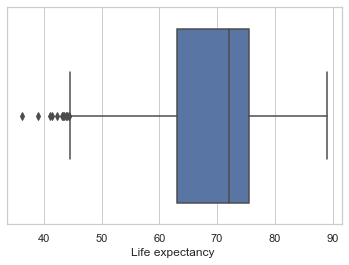

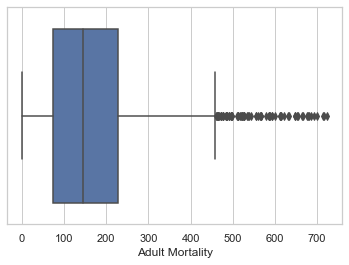

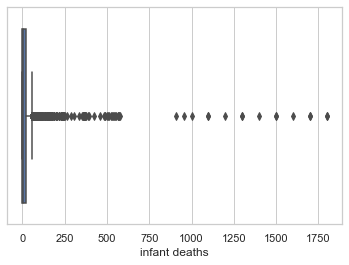

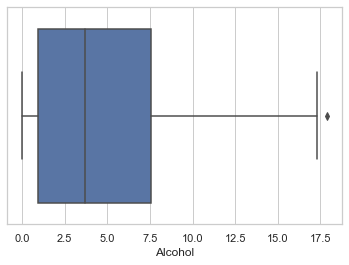

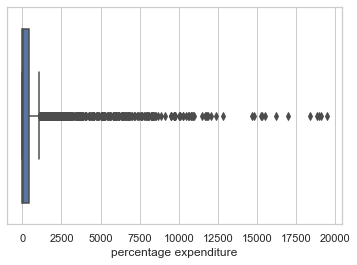

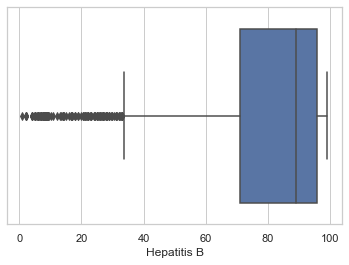

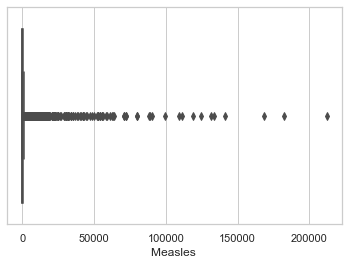

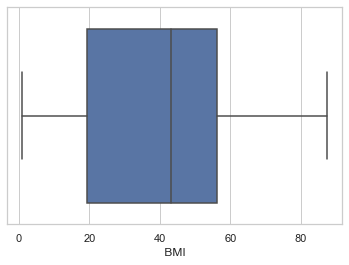

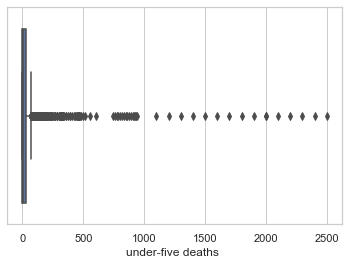

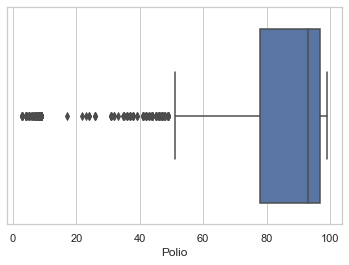

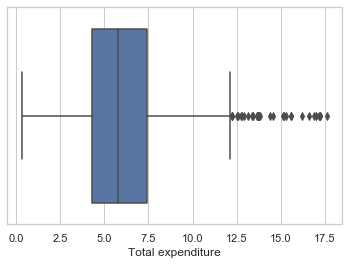

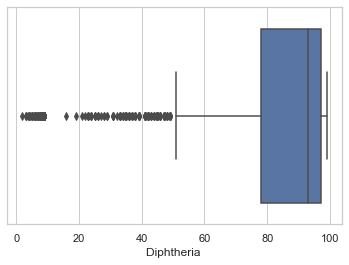

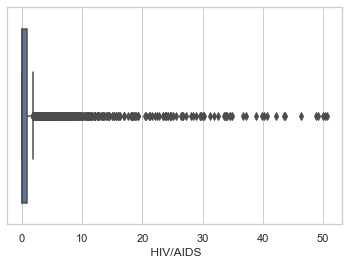

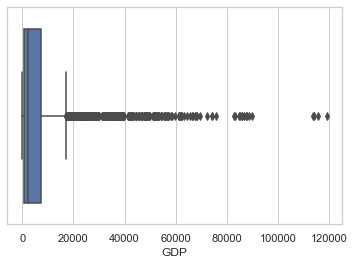

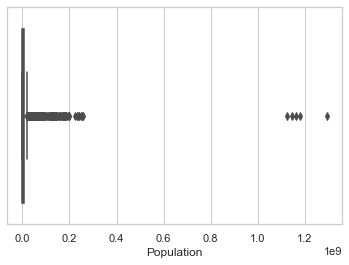

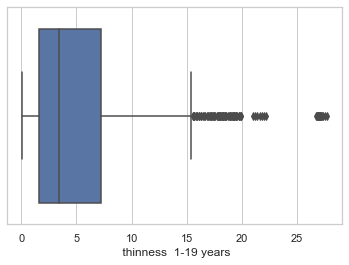

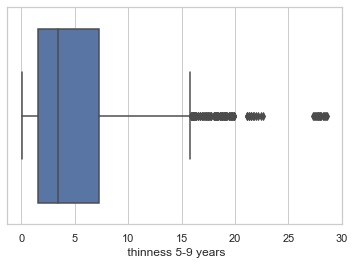

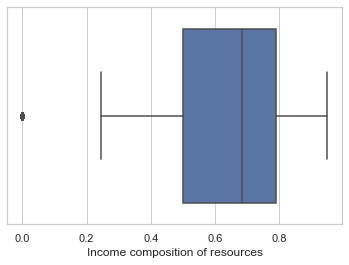

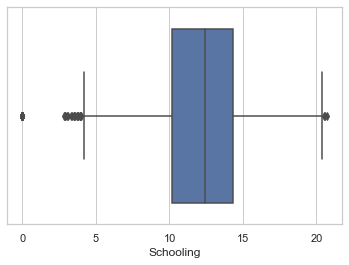

<IPython.core.display.Javascript object>

In [18]:
life_num = life_expc_df.drop(['Country', 'Year', 'Status'], axis=1)
for col in life_num:
    sns.boxplot((life_expc_df[col]))
    plt.show()


In [19]:
for col in life_num:
    zscores = zscore(life_expc_df[col])
    print(
        "For column {}, there are {} outliers".format(
            col, len((np.where(zscores > 1.5)[0]))
        )
    )

For column Life expectancy , there are 71 outliers
For column Adult Mortality, there are 244 outliers
For column infant deaths, there are 83 outliers
For column Alcohol, there are 310 outliers
For column percentage expenditure, there are 174 outliers
For column Hepatitis B, there are 0 outliers
For column Measles , there are 84 outliers
For column  BMI , there are 55 outliers
For column under-five deaths , there are 84 outliers
For column Polio, there are 0 outliers
For column Total expenditure, there are 167 outliers
For column Diphtheria , there are 0 outliers
For column  HIV/AIDS, there are 135 outliers
For column GDP, there are 223 outliers
For column Population, there are 67 outliers
For column  thinness  1-19 years, there are 236 outliers
For column  thinness 5-9 years, there are 224 outliers
For column Income composition of resources, there are 0 outliers
For column Schooling, there are 131 outliers


<IPython.core.display.Javascript object>

Some of these features are farily normal, while others are heavily skewed. I will winsorize the more normal data, and transform the more heavily skewed data.

In [20]:
life_num.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

<IPython.core.display.Javascript object>

In [21]:
col_to_winsorize = life_expc_df[
    [
        "Life expectancy ",
        "Adult Mortality",
        "Alcohol",
        " BMI ",
        "infant deaths",
        "percentage expenditure",
        "Measles ",
        "under-five deaths ",
        "Income composition of resources",
        "Schooling",
    ]
]
for col in col_to_winsorize:
    life_expc_df[col] = winsorize(life_expc_df[col], (0.1, 0.1))

<IPython.core.display.Javascript object>

In [22]:
col_to_transform = life_num.drop(
    [
        "Life expectancy ",
        "Adult Mortality",
        "Alcohol",
        " BMI ",
        "infant deaths",
        "percentage expenditure",
        "Measles ",
        "under-five deaths ",
        "Income composition of resources",
        "Schooling",
    ],
    axis=1,
)
for col in col_to_transform:
    life_expc_df[col] = np.log(life_expc_df[col])

<IPython.core.display.Javascript object>

Now let's re-generate our boxplots to see how the distributions were affected

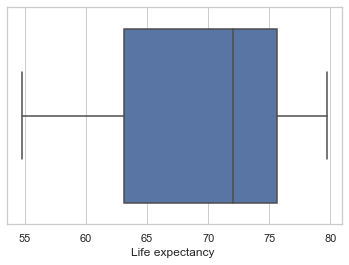

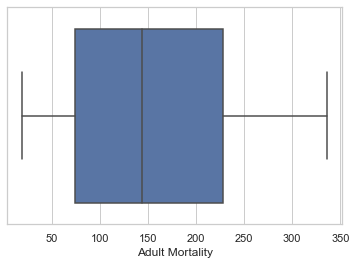

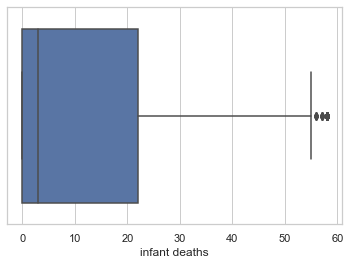

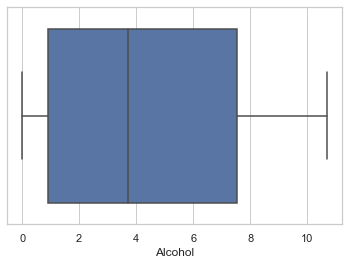

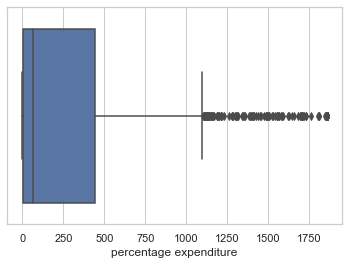

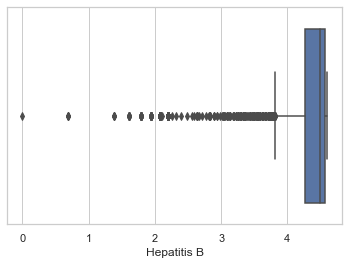

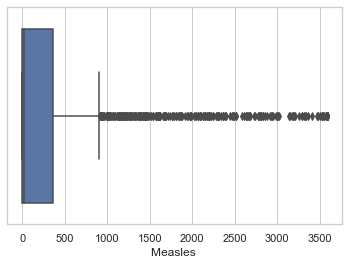

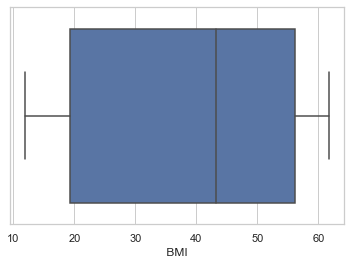

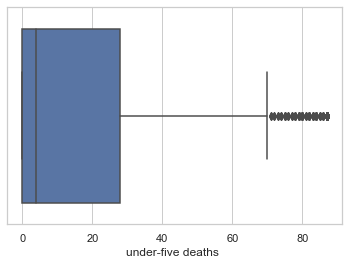

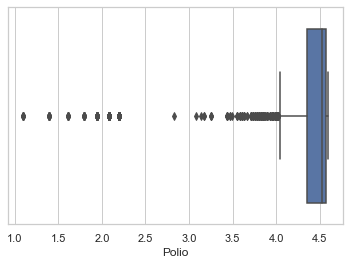

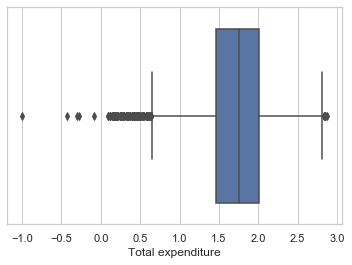

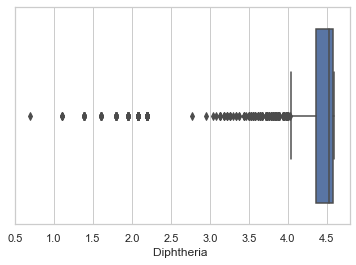

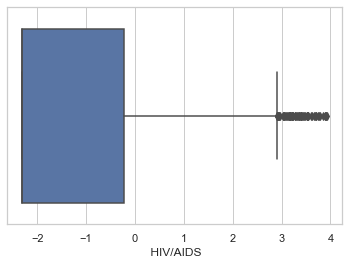

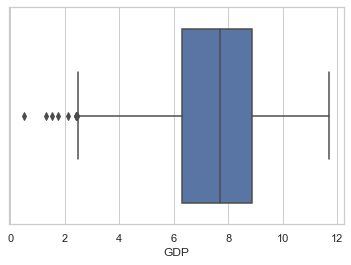

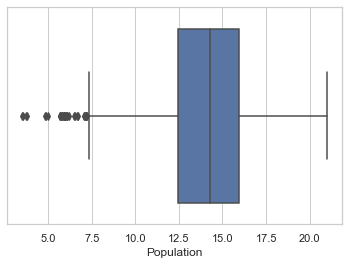

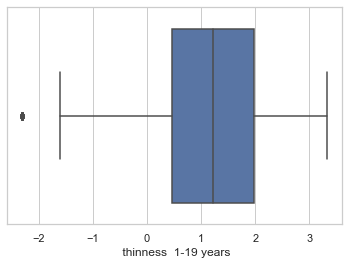

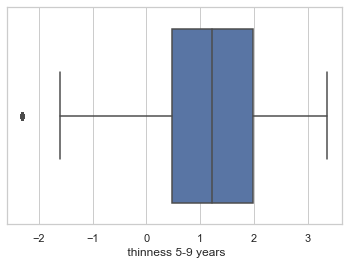

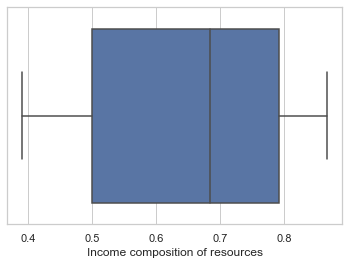

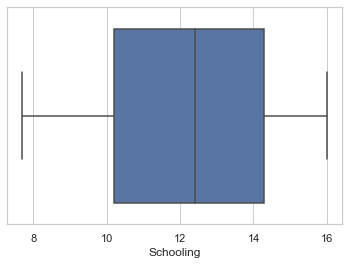

<IPython.core.display.Javascript object>

In [23]:
for col in life_num:
    sns.boxplot((life_expc_df[col]))
    plt.show()

## Multi and Univariate Analysis

In [24]:
life_expc_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.372805,155.869809,13.948945,4.405267,369.795323,4.243120,586.539823,38.585295,20.004765,4.304552,1.683981,4.299369,-1.221949,7.593626,14.060290,1.139079,1.128091,0.651730,12.175837
std,4.613841,8.165724,100.426814,19.797841,3.717753,588.210378,0.632220,1151.099202,18.303398,29.592867,0.617272,0.474496,0.622426,1.613377,1.814503,2.553151,1.043731,1.077558,0.159155,2.639981
min,2000.000000,54.800000,19.000000,0.000000,0.010000,0.000000,0.000000,0.000000,11.900000,0.000000,1.098612,-0.994252,0.693147,-2.302585,0.519597,3.526361,-2.302585,-2.302585,0.391000,7.700000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,4.262680,0.000000,19.325000,0.000000,4.356709,1.461517,4.356709,-2.302585,6.316476,12.443518,0.470004,0.470004,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,4.488636,17.000000,43.250000,4.000000,4.532599,1.750937,4.532599,-2.302585,7.692880,14.270603,1.223775,1.223775,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,4.564348,360.250000,56.100000,28.000000,4.574711,2.006871,4.574711,-0.223144,8.879525,15.921562,1.974081,1.987874,0.791107,14.300000
max,2015.000000,79.700000,336.000000,58.000000,10.680000,1855.828806,4.595120,3585.000000,61.800000,87.000000,4.595120,2.867899,4.595120,3.923952,11.688329,20.980895,3.321432,3.353407,0.866000,16.000000


<IPython.core.display.Javascript object>

In [25]:
life_expc_df.describe(include=["O"])

,Country,Status
count,2938,2938
unique,193,2
top,Grenada,Developing
freq,16,2426


<IPython.core.display.Javascript object>

In [26]:
life_expc_df.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.137232,-0.053579,-0.048067,-0.059290,0.023991,0.091843,-0.157078,0.097472,-0.053827,0.065983,0.054571,0.108473,-0.095239,0.131011,0.030462,-0.031550,-0.032359,0.168418,0.170341
Life expectancy,0.137232,1.000000,-0.681164,-0.571524,0.416173,0.484144,0.173934,-0.299763,0.612446,-0.599108,0.326688,0.167347,0.342535,-0.810099,0.539770,-0.060700,-0.533520,-0.539113,0.814353,0.758069
Adult Mortality,-0.053579,-0.681164,1.000000,0.372476,-0.220056,-0.339616,-0.104030,0.167902,-0.418711,0.386958,-0.201475,-0.104318,-0.204671,0.570360,-0.343677,0.053829,0.374006,0.386276,-0.539590,-0.480255
infant deaths,-0.048067,-0.571524,0.372476,1.000000,-0.324389,-0.323234,-0.147340,0.561331,-0.473700,0.993803,-0.252255,-0.106877,-0.229257,0.405583,-0.355806,0.306860,0.404333,0.421025,-0.477035,-0.505560
Alcohol,-0.059290,0.416173,-0.220056,-0.324389,1.000000,0.384474,0.062107,-0.168554,0.352883,-0.320772,0.156818,0.241376,0.150718,-0.185094,0.412501,0.002062,-0.420239,-0.417988,0.521235,0.545191
percentage expenditure,0.023991,0.484144,-0.339616,-0.323234,0.384474,1.000000,0.022943,-0.157610,0.332420,-0.319952,0.143219,0.087739,0.129296,-0.289129,0.659506,-0.013508,-0.369868,-0.378457,0.520042,0.500711
Hepatitis B,0.091843,0.173934,-0.104030,-0.147340,0.062107,0.022943,1.000000,-0.137204,0.128802,-0.152878,0.294640,0.083425,0.428847,-0.159420,0.071503,-0.012666,-0.031940,-0.034915,0.140433,0.142202
Measles,-0.157078,-0.299763,0.167902,0.561331,-0.168554,-0.157610,-0.137204,1.000000,-0.321415,0.563575,-0.185799,-0.133851,-0.164805,0.181257,-0.192944,0.193510,0.259977,0.265814,-0.223270,-0.270639
BMI,0.097472,0.612446,-0.418711,-0.473700,0.352883,0.332420,0.128802,-0.321415,1.000000,-0.494495,0.219531,0.195161,0.219836,-0.508224,0.416208,-0.025834,-0.554101,-0.559917,0.585770,0.574174
under-five deaths,-0.053827,-0.599108,0.386958,0.993803,-0.320772,-0.319952,-0.152878,0.563575,-0.494495,1.000000,-0.265814,-0.110218,-0.244649,0.436639,-0.366366,0.293864,0.406197,0.420313,-0.496172,-0.520845


<IPython.core.display.Javascript object>

I see several variables with very strong correlations to life expectancy: alcohol, percent expenditure, BMI, the vaccine metrics, etc. Some of the strongest correlate sof life expectancy are factors that directly infleunce it, such as adult mortality age and number if infant deaths. The monetary and vaccination features seem to have the strongest effects.

### Feature Engineering


In [27]:
X = life_num.drop("Life expectancy ", axis=1)
y = life_expc_df["Life expectancy "]

<IPython.core.display.Javascript object>

In [28]:
selector = SelectKBest(f_classif, k=5)

# Use `.fit()` method so the selector can 'learn' from our data
selector.fit(X, y)

# Use `.transform()` method so the selector can apply
# what it learned in `.fit()`
k_best = selector.transform(X)

# We can see/rank which features were the best
score_df = pd.DataFrame({"feature": X.columns, "f_score": selector.scores_})
score_df = score_df.sort_values("f_score", ascending=False)
print(score_df.head())

                            feature    f_score
17                        Schooling  15.665641
16  Income composition of resources  14.271841
0                   Adult Mortality  12.712659
11                         HIV/AIDS   8.040533
6                              BMI    7.254024


<IPython.core.display.Javascript object>

Using the KBest Selector, I find Schooling, Income composition of resources, adult mortality, HIV/AIDS rate, and BMI to be the strongest 5 predictors of life expectancy

### Summary

Some of the data was missing values for every year, while some values were missing at random. With a little research, some of the missing values would be accurately filled in by hand, especially columns like `population` or `GDP`. Interpolating works best for the randomly missing points as there are many points to reference to. I would have been satisfied with my method of filling in values by referencing averages for similar countries, but this will need debugging.

The features most strongly related to life expectancy could be broken into "financial" and "biological" categories, with "biological" features containing a possible set for "vaccinations". By breaking the best predicting variable into these groups, a good start is made towards component analysis and feature reduction. 



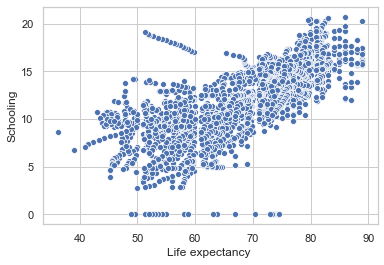

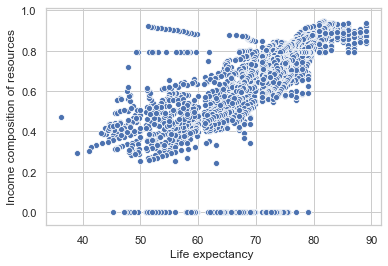

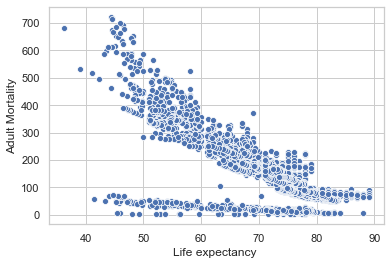

<IPython.core.display.Javascript object>

In [29]:
sns.scatterplot(life_num["Life expectancy "], life_num["Schooling"])
plt.show()
sns.scatterplot(
    life_num["Life expectancy "], life_num["Income composition of resources"]
)
plt.show()
sns.scatterplot(life_num["Life expectancy "], life_num["Adult Mortality"])